<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%208/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dan Load Data

In [1]:
# Import library dan load dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

# Load data Iris
iris = load_iris()
X = iris.data         # 4 fitur: sepal dan petal (panjang & lebar)
y = iris.target       # label kelas: Setosa, Versicolor, Virginica

Standarisasi Fitur

In [2]:
# Scaling fitur agar setiap fitur memiliki mean=0 dan std=1
X_scaled = StandardScaler().fit_transform(X)


PCA (Principal Component Analysis)

In [3]:
# PCA untuk reduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variansi yang dijelaskan oleh 2 komponen utama
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


Visualisasi Proyeksi PCA

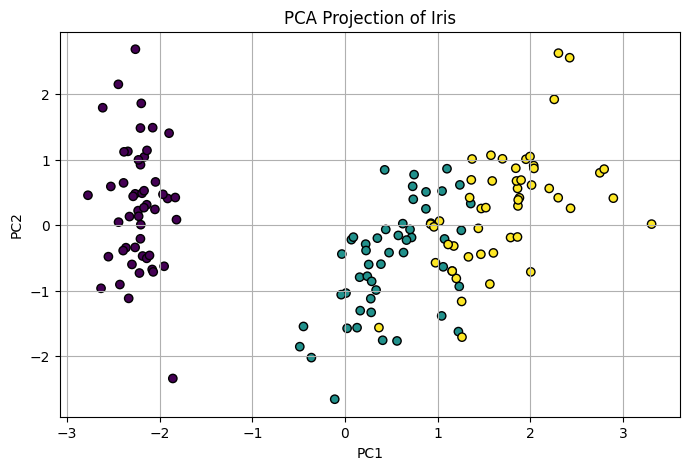

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("PCA Projection of Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()


Inverse Transform

In [5]:
# Mengembalikan data 2D hasil PCA ke ruang aslinya (approximation)
X_reconstructed = pca.inverse_transform(X_pca)


Menentukan Jumlah Komponen Optimal

In [6]:
# Mencari berapa banyak komponen yang dibutuhkan untuk menjelaskan ≥95% variansi
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(f"Number of components to preserve 95% variance: {d}")


Number of components to preserve 95% variance: 2


Kernel PCA (Non-Linear)

In [7]:
# Kernel PCA menggunakan fungsi RBF untuk menangkap hubungan non-linear
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
X_kpca = rbf_pca.fit_transform(X_scaled)


Locally Linear Embedding (LLE)

In [8]:
# LLE mempertahankan hubungan lokal antar titik tetangga
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)


 Perbandingan Visual PCA vs KernelPCA vs LLE

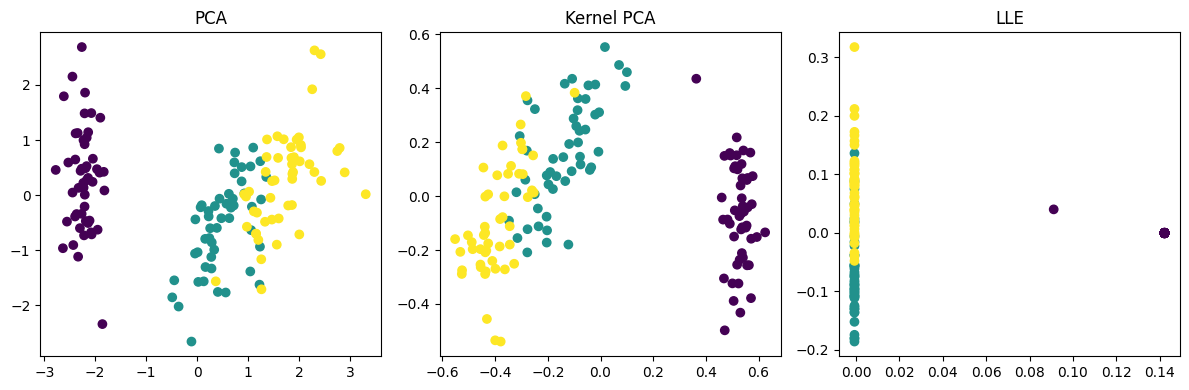

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.title("PCA")

plt.subplot(132)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="viridis")
plt.title("Kernel PCA")

plt.subplot(133)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap="viridis")
plt.title("LLE")

plt.tight_layout()
plt.show()
